In [26]:
import matplotlib.pyplot as plt
from operator import *
from random import *
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

In [36]:
def nearest_neighbour(agent, agents):
    """
    Returns the agent that has smallest Eucledian distance to agent in question
    """
    distances = [(a[0] - agent[0])**2 + (a[1] - agent[1])**2 for a in agents]
    i = next(i for i in range(len(agents)) if agents[i] == agent)
    distances[i] = distances[-i] + 1

    return distances.index(min(distances))

    ##^^^^^^^FIX^^^^^^^^^##

def initialize(randspeeds = True, N = 100, width = 10, height = 10):
    
    if randspeeds:
        return [[width*random(),height*random(),2*(random() - 0.5), 2*(random() - 0.5)] for i in range(N)]
    else:
        return [[width*random(),height*random(), 0, 0] for i in range(N)]

    
def treat_boundary(x_bound, y_bound, agent):
    [x, y] = agent[0:2]
    if x > x_bound or x < 0:
        agent[2] = -agent[2]

    if y > y_bound or y < 0:
        agent[3] = -agent[3]

def plotPoints(agents):
    plt.clf()
    plt.plot([x[0] for x in agents], [x[1] for x in agents], 'ro', markersize = 2)
    plt.show()
    #plt.pause(0.05)
    
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)



In [37]:
def couzin_2002():
    return

def vicsek():
    return

def gueron():
    return

In [38]:
def simulate(N_steps = 10, a = 1, dt = 0.01, N = 100, randspeeds = True):
    """
    Simulates motion of swarm. Recieves following parameters:

    N_steps  - number of steps to perform
    a -  coupling between neighbouring points
    dt - time step to be used 
    N = number of points to be used
    randspeed - indicates wether we should use random initial speeds

    """

    agents = initialize(randspeeds, N)
    plt.ion()
    for i in range(N_steps):
        for agent in agents:
            pstep = map(lambda x: dt * x, agent[2:4])
            #print(agent)
            agent[0:2] = map(add, agent[0:2], pstep)

        nearest_neighbours = [agents[nearest_neighbour(agent, agents)][:] for agent in agents]
        #print(agents)
        for i in range(len(agents)):
            weightedAgent = map(lambda x: a * x, nearest_neighbours[i])
            #print(agents[i],'<-',weightedAgent)
            agents[i][2:4] = map(lambda x: (1 - a) * x, agents[i][2:4]) 
            agents[i][2:4] = map(add, agents[i][2:4], weightedAgent[2:4])

            treat_boundary(15, 15, agents[i])
            #print(agent)

        plotPoints(agents)
    plt.close()


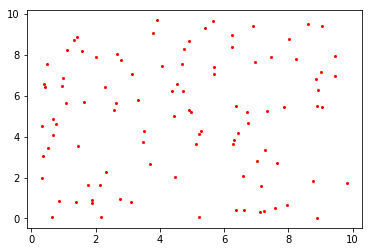

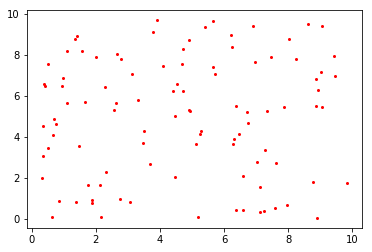

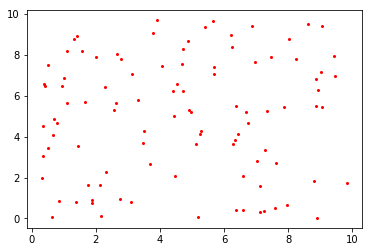

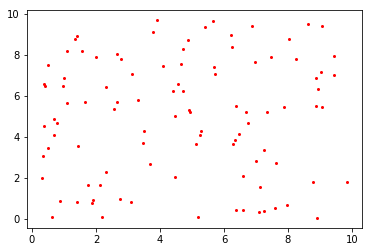

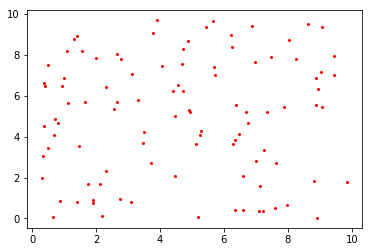

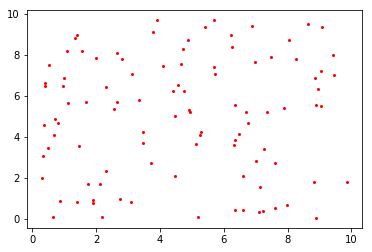

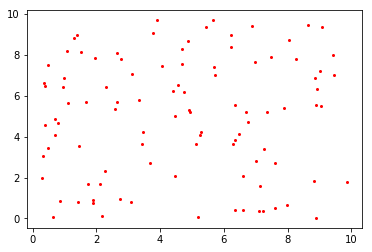

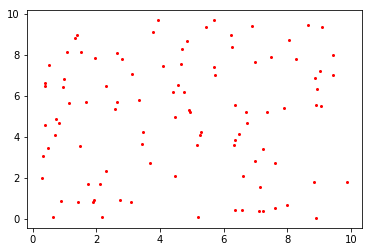

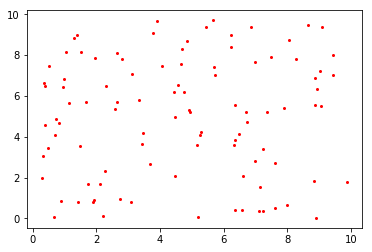

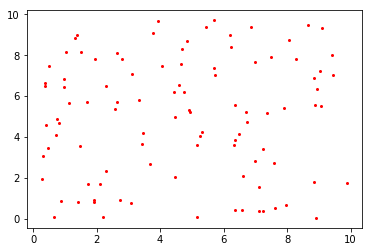

KeyError: u'ffmpeg'

In [39]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

simulate()

HTML(anim.to_html5_video())